In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import tensortools.numpy.fft as np_fft

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


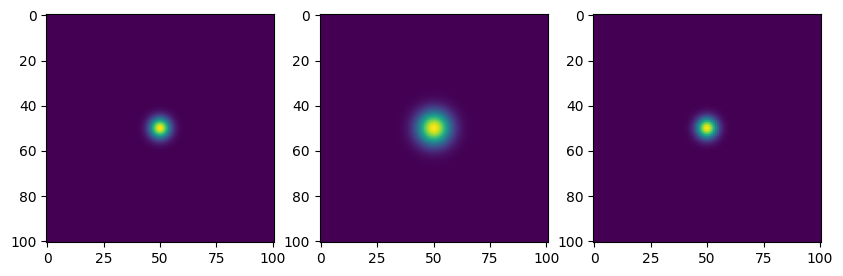

In [40]:
sz = 100
x = np.arange(-sz//2, sz//2+1)
X, Y = np.meshgrid(x, x)
R = np.sqrt(np.square(X) + np.square(Y))

z_np = np.exp(-np.square(R)/20) #* np.exp(1j * 2 * np.pi * np.random.rand(*X.shape))
ft_np = np_fft.fft2(z_np)
frt_np = np_fft.ffrt2(z_np, dz=1000e-3, pixel_size=1e-6, wavelength=1064e-9)

fig, axs = plt.subplots(1, 3, figsize=(10,3))
axs[0].imshow(np.abs(z_np))
axs[1].imshow(np.abs(ft_np))
axs[2].imshow(np.abs(frt_np))